# The influence of ICT on PISA test performance
## by Phillip Schneider

## Investigation Overview

> The overall goal of this data analysis project is to investigate the impact of information and communication technology (ICT) on students' PISA test scores. To this end, different aspects like ICT availability, age of first use, current frequency of usage, user behavior and their corresponding effects on academic performance are explored in depth.

## Dataset Overview

> The dataset originates from the Programme for International Student Assessment (PISA), which is a worldwide large-scale study by the Organization for Economic Co-operation and Development (OECD). The results are from the year 2012. During the data preparation, relevant variables from the ICT questionnaire of the PISA study were selected. In total, the dataset consists of 299843 student records and 22 variables.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the preprocessed PISA dataset into a pandas dataframe
pisa_df = pd.read_csv("pisa_new.csv", encoding="utf-8")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Availability and use of computers at school

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

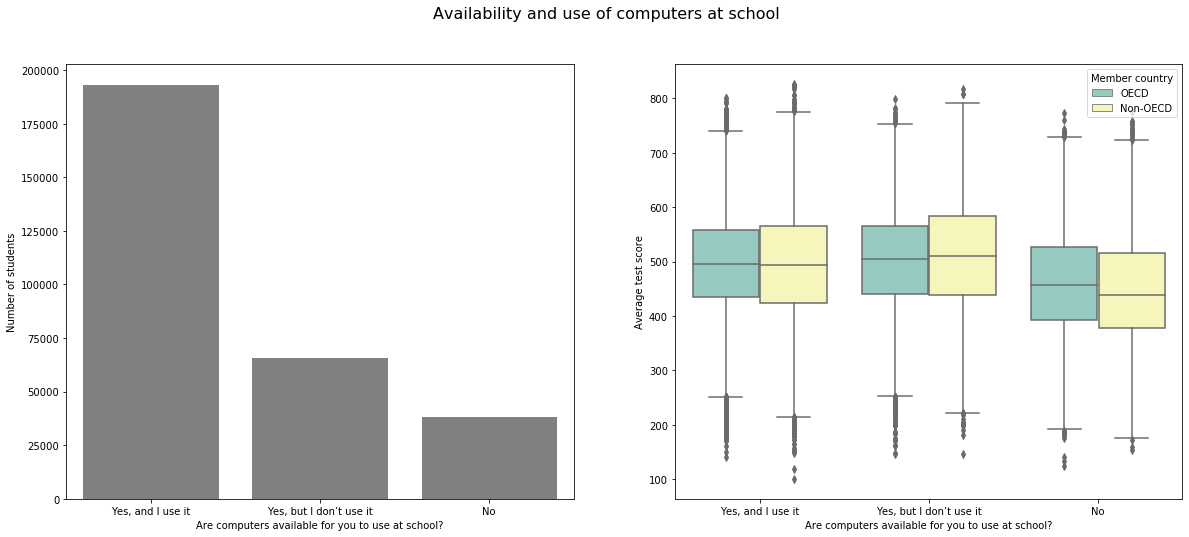

In [3]:
fig, ax = plt.subplots(1,2, figsize = [20,8])
fig.suptitle("Availability and use of computers at school", fontsize=16)

# Create bar chart
sb.countplot(data = pisa_df, x = "at_school_computer", ax = ax[0], 
             order = pisa_df["at_school_computer"].value_counts().index, color="grey")
ax[0].set_ylabel("Number of students")
ax[0].set_xlabel("Are computers available for you to use at school?")

# Create boxplot
sb.boxplot(data = pisa_df, x = "at_school_computer", y = "avg_total_score", hue = "oecd", 
           palette="Set3", ax = ax[1], order = pisa_df.at_school_computer.value_counts().index)
ax[1].set_ylabel("Average test score")
ax[1].set_xlabel("Are computers available for you to use at school?")
plt.legend(title="Member country", loc="upper right")
plt.show();

## Average test score in relation to age of first ICT use 

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

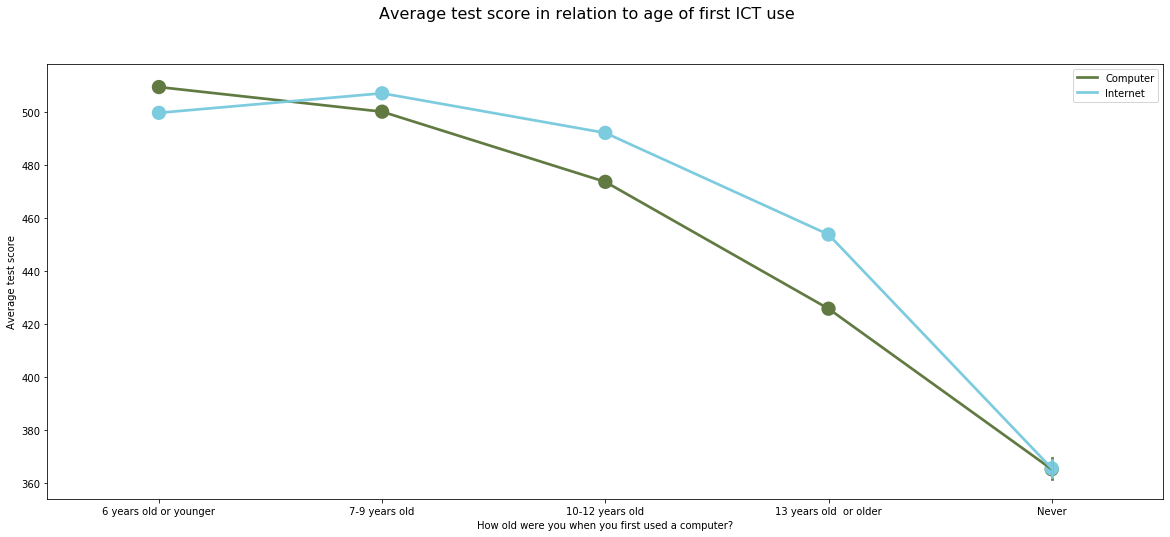

In [4]:
plt.figure(figsize=[20, 8])
plt.suptitle("Average test score in relation to age of first ICT use", fontsize=16)

# Create line plot for two variables
for v in [("first_use_computer", "#617a42"), ("first_use_internet", "#7dcbdf")]:
    sb.pointplot(data = pisa_df, x = v[0], y = "avg_total_score",
                 color = v[1], order = ["6 years old or younger", "7-9 years old", "10-12 years old", 
                                         "13 years old  or older", "Never"])

# Set legend manually
plt.legend(labels=["Computer", "Internet"])
ax = plt.gca()
ax.get_legend().legendHandles[0].set_color("#617a42")
ax.get_legend().legendHandles[1].set_color("#7dcbdf")
ax.set_ylabel("Average test score")
ax.set_xlabel("How old were you when you first used a computer?")
plt.setp(ax.collections, sizes=[150])
plt.show();

## Correlation between study time on the computer and average test scores



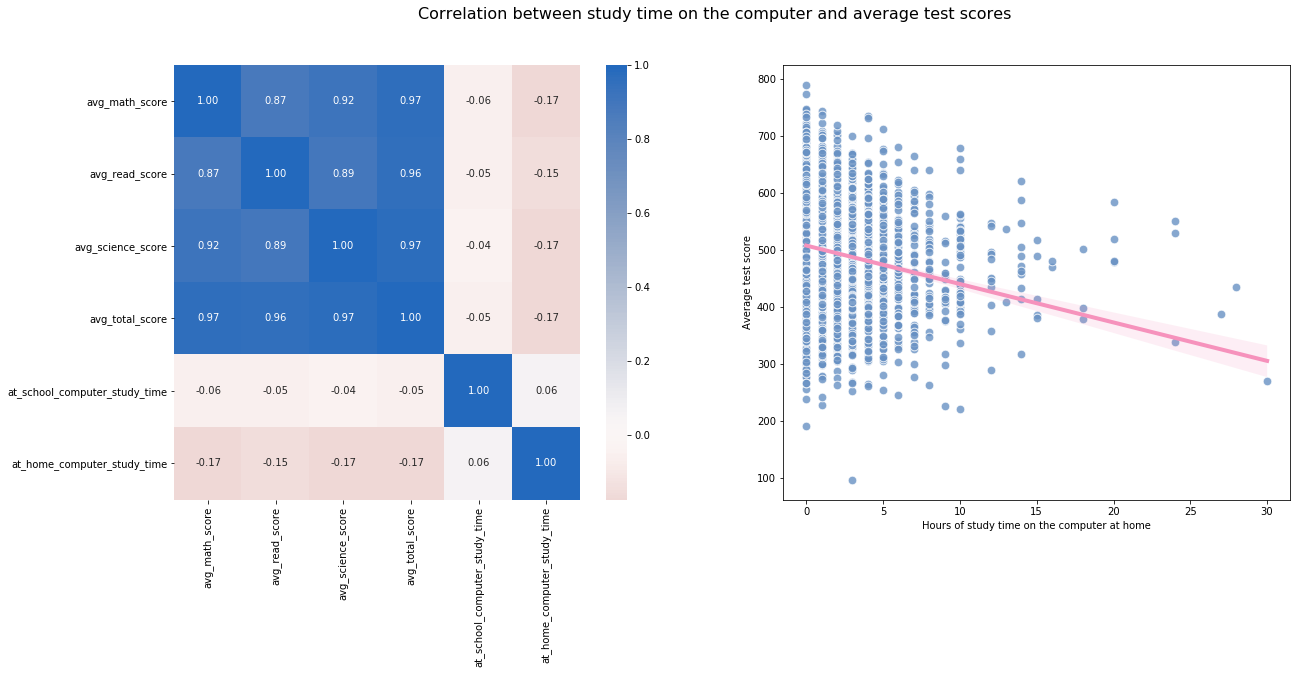

In [5]:
# Sample random subset of 10000 records from pisa data
pisa_df_sample = pisa_df.sample(10000, random_state=42)
numeric_vars = ["avg_math_score", "avg_read_score", "avg_science_score", "avg_total_score", "at_school_computer_study_time", "at_home_computer_study_time"]

fig, ax = plt.subplots(1,2, figsize = [20,8])
fig.suptitle("Correlation between study time on the computer and average test scores", fontsize=16)

# Create correlation matrix with heatmap
sb.heatmap(pisa_df_sample[numeric_vars].corr(), annot = True, fmt = ".2f", cmap = "vlag_r", center = 0, ax = ax[0])

# Create scatter plot with linear regression line
sb.regplot(x="at_home_computer_study_time", y="avg_total_score", data=pisa_df_sample, x_jitter=0, ax = ax[1],
          line_kws={"color": "#F692BC", "lw":4}, scatter_kws={"linewidths":1,"edgecolor":"w", "s":75, "color": "#6891C3"})
ax[1].set_ylabel("Average test score")
ax[1].set_xlabel("Hours of study time on the computer at home")
plt.show();


## Average test score in relation to frequency of ICT use at school



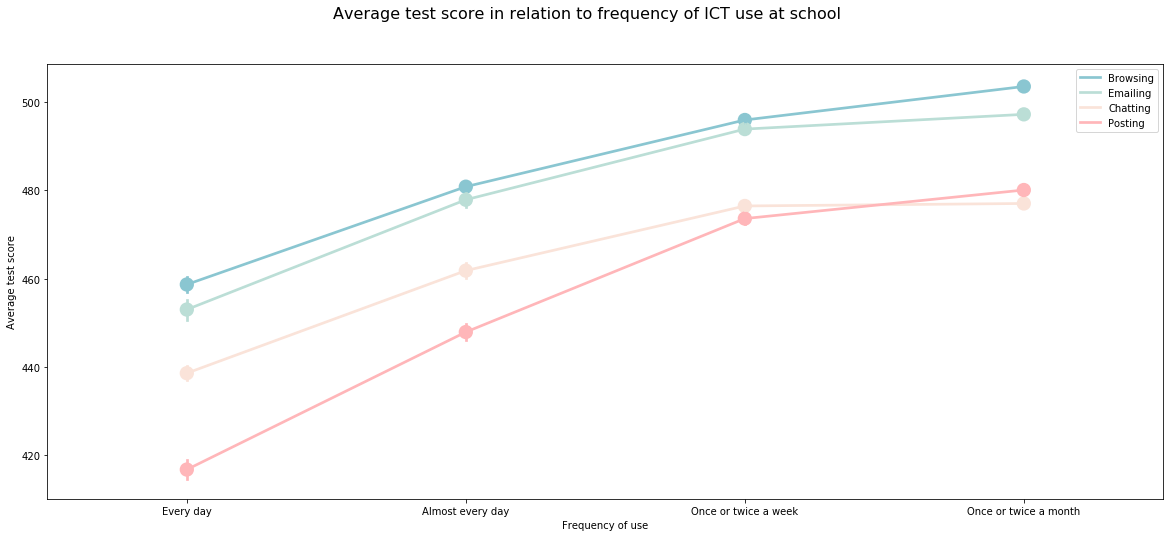

In [6]:
plt.figure(figsize=[20, 8])
plt.suptitle("Average test score in relation to frequency of ICT use at school", fontsize=16)
variable_colors = [("at_school_browsing", "#8ac6d1"), ("at_school_emailing", "#bbded6"), ("at_school_chatting", "#fae3d9"), ("at_school_posting", "#ffb6b9")]
# Create line plot with four variables
for v in variable_colors: 
    ax = sb.pointplot(data = pisa_df, x = v[0], y = "avg_total_score", order = ["Every day", "Almost every day", "Once or twice a week",
           "Once or twice a month"], color = v[1], linestyles = "-")

# Set legend manually
plt.legend(labels=["Browsing", "Emailing", "Chatting", "Posting"])
ax = plt.gca()
for v in variable_colors:
    ax.get_legend().legendHandles[variable_colors.index(v)].set_color(v[1])
ax.set(xlabel = "Frequency of use", ylabel= "Average test score")
plt.setp(ax.collections, sizes=[150])
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_pisa_data.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

## Conclusion

